In [6]:
!pip install -q -U geopandas contextily networkx

^C


In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely import *
from shapely.plotting import *
import math
import numpy as np

In [9]:
import contextily as ctx
print(list(ctx.providers.keys()))

['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'BaseMapDE', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'TopPlusOpen', 'Gaode', 'Strava', 'OrdnanceSurvey']


In [13]:
listings = pd.read_csv('dados/listings.csv')


display(listings.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,14667447,Oporto - Paranhos,76561575,Nelson,PORTO,Paranhos,41.16886,-8.60254,Entire home/apt,NaN,2,0,NaN,NaN,1,0,0,NaN
1,17136811,"GAIA (OPORTO , PORTUGAL) - CENTER",109834431,Joana,VILA NOVA DE GAIA,Mafamude e Vilar do Paraíso,41.11466,-8.60563,Private room,NaN,1,2,2017-04-21,0.02,1,0,0,NaN
2,17730260,Home sweet little home,12605401,Maria,PORTO,Paranhos,41.16795,-8.62140,Entire home/apt,NaN,3,92,2020-11-06,1.11,1,0,0,41045/AL
3,21027292,BedNShower EuroPorto,111401508,Adriano,PORTO,Bonfim,41.14755,-8.59364,Private room,NaN,1,0,NaN,NaN,2,0,0,NaN
4,23975787,Pretty Porto Apartment by SOULSHARING.PORTO,180330708,Jurjen,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.15372,-8.60886,Entire home/apt,245.0,2,52,2024-02-25,0.72,1,243,12,66366/AL


In [15]:
neighbourhoods = gpd.read_file("dados/neighbourhoods.geojson")
display(neighbourhoods.head())

,neighbourhood,neighbourhood_group,geometry
0,Lordelo do Ouro e Massarelos,PORTO,"MULTIPOLYGON (((-8.63594 41.15976, -8.63587 41..."
1,Sobreira,PAREDES,"MULTIPOLYGON (((-8.37945 41.15602, -8.38011 41..."
2,Fornos,SANTA MARIA DA FEIRA,"MULTIPOLYGON (((-8.52277 40.92120, -8.52273 40..."
3,Bonfim,PORTO,"MULTIPOLYGON (((-8.58820 41.16705, -8.58839 41..."
4,Ramalde,PORTO,"MULTIPOLYGON (((-8.62268 41.18025, -8.62278 41..."


In [20]:
reviews_por_zona = listings.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()
display(reviews_por_zona.head())

,neighbourhood,number_of_reviews
0,"AVer-o-Mar, Amorim e Terroso",1162
1,Agrela,59
2,Aguiar de Sousa,322
3,Aguçadoura e Navais,403
4,"Aldoar, Foz do Douro e Nevogilde",9127


In [23]:
zonas_com_reviews = neighbourhoods.merge(reviews_por_zona, on='neighbourhood')
display(zonas_com_reviews)

,neighbourhood,neighbourhood_group,geometry,number_of_reviews
0,Lordelo do Ouro e Massarelos,PORTO,"MULTIPOLYGON (((-8.63594 41.15976, -8.63587 41...",25604
1,Sobreira,PAREDES,"MULTIPOLYGON (((-8.37945 41.15602, -8.38011 41...",90
2,Fornos,SANTA MARIA DA FEIRA,"MULTIPOLYGON (((-8.52277 40.92120, -8.52273 40...",0
3,Bonfim,PORTO,"MULTIPOLYGON (((-8.58820 41.16705, -8.58839 41...",72664
4,Ramalde,PORTO,"MULTIPOLYGON (((-8.62268 41.18025, -8.62278 41...",5715
...,...,...,...,...
153,"AVer-o-Mar, Amorim e Terroso",PÓVOA DE VARZIM,"MULTIPOLYGON (((-8.70463 41.42565, -8.70206 41...",1162
154,Aguçadoura e Navais,PÓVOA DE VARZIM,"MULTIPOLYGON (((-8.74600 41.43114, -8.74595 41...",403
155,Rates,PÓVOA DE VARZIM,"MULTIPOLYGON (((-8.67204 41.44574, -8.67188 41...",297
156,Laundos,PÓVOA DE VARZIM,"MULTIPOLYGON (((-8.71363 41.45476, -8.71345 41...",110


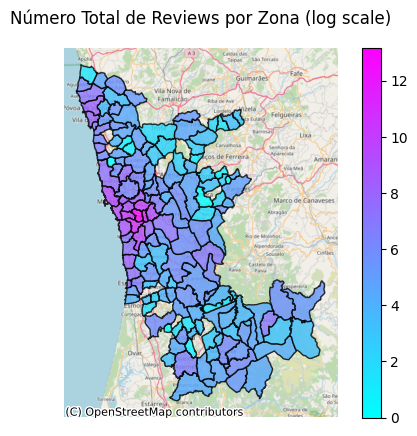

In [2]:
listings = pd.read_csv('dados/listings.csv')
neighbourhoods = gpd.read_file("dados/neighbourhoods.geojson")

def desenhaZonas():
    # preencher
    # Agrupar e somar os reviews por zona
    reviews_por_zona = listings.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()
    
    # Juntar com o GeoDataFrame das zonas
    zonas_com_reviews = neighbourhoods.merge(reviews_por_zona, on='neighbourhood')
    
        # Aplicar a transformação logarítmica
    zonas_com_reviews['log_reviews'] = np.log1p(zonas_com_reviews['number_of_reviews'])
    
    # Verificar se o DataFrame resultante não está vazio
    if zonas_com_reviews.empty:
        print("Não há dados suficientes para desenhar o mapa.")
        return
    
    # Converter o GeoDataFrame para utilizar a projeção correta para adicionar o mapa base
    zonas_com_reviews = zonas_com_reviews.to_crs(epsg=3857)
    
    # Desenhar o mapa
    ax = zonas_com_reviews.plot(column='log_reviews', cmap='cool', alpha=0.8, edgecolor='k', legend=True)
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
    
    # Configurações adicionais para melhor visualização
    ax.set_axis_off()
    legend = ax.get_legend()
    if legend:
        legend.set_bbox_to_anchor((1, 1))
    ax.set_title('Número Total de Reviews por Zona (log scale)')
    
    plt.show()

# Chamar a função para desenhar o mapa
desenhaZonas()

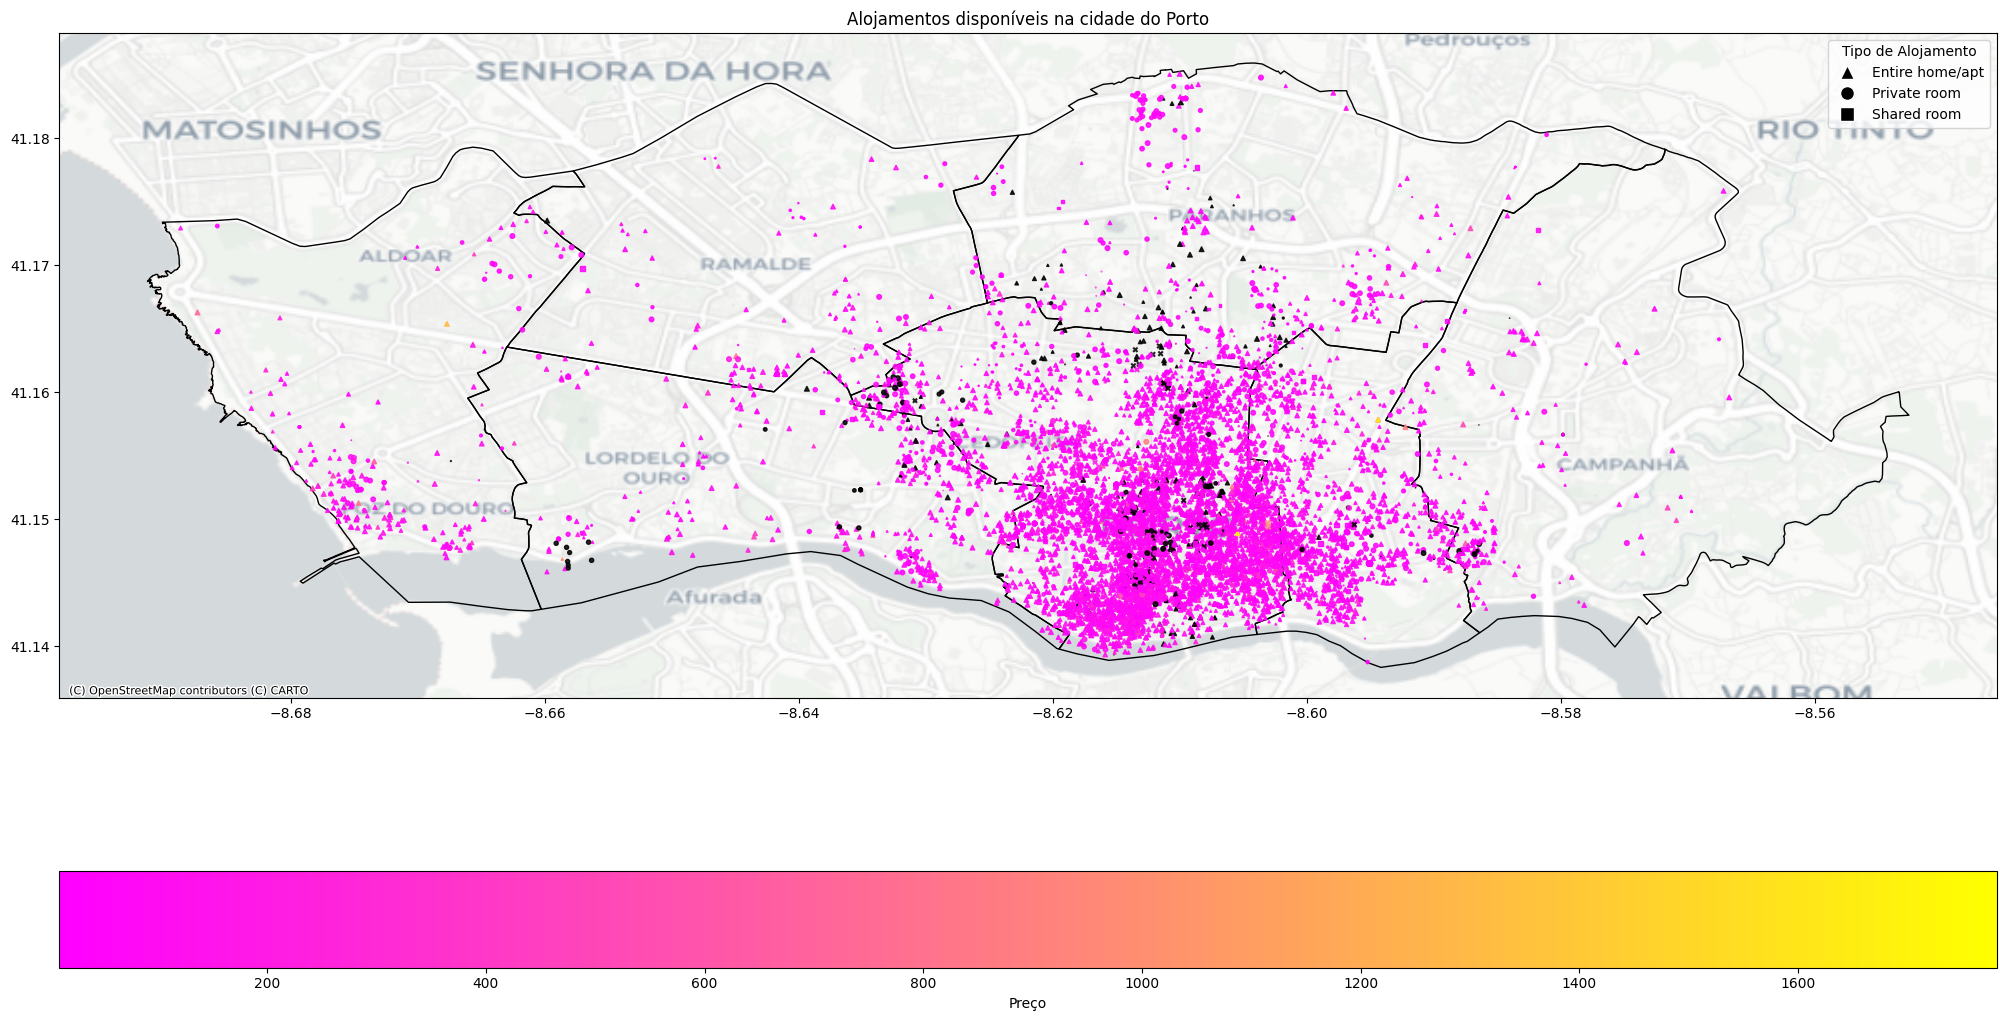

In [103]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from scipy.stats import rankdata

def desenhaAlojamentos():
    # Filtrar alojamentos e bairros no Porto, garantindo que é uma cópia
    porto_listings = listings[listings['neighbourhood_group'] == 'PORTO'].copy()
    porto_neighbourhoods = neighbourhoods[neighbourhoods['neighbourhood_group'] == 'PORTO']
    
    # Definir a figura e o eixo
    fig, ax = plt.subplots(figsize=(25, 15))
    porto_neighbourhoods.plot(ax=ax, color='none', edgecolor='black')
    
    # Aplicar normalização por quantis nos preços e criar mapa de cores
    #porto_listings['price_rank'] = rankdata(porto_listings['price'], method='average') / len(porto_listings['price'])
    #norm = Normalize(vmin=0, vmax=1)
    norm = Normalize(vmin=porto_listings['price'].min(), vmax=porto_listings['price'].max())
    cmap = plt.get_cmap('spring')
    mappable = ScalarMappable(norm=norm, cmap=cmap)
    porto_listings['color'] = porto_listings['price'].apply(lambda x: mappable.to_rgba(x))
    
    # Mapear tipos de alojamento a marcadores
    marker_dict = {'Entire home/apt': '^', 'Private room': 'o', 'Shared room': 's'}

    # Criar handles para a legenda
    handles = [plt.Line2D([0], [0], marker=marker, color='w', markerfacecolor='k', markersize=10, linestyle='None')
               for marker in marker_dict.values()]
    labels = list(marker_dict.keys())
    
    # Plotar usando scatter com parâmetros agrupados por tipo de alojamento
    for room_type, group in porto_listings.groupby('room_type'):
        marker = marker_dict.get(room_type, 'x')  # Define o marcador ou usa 'x' como fallback
        ax.scatter(group['longitude'], group['latitude'],
                   c=group['color'], s=group['availability_365'] / 32,
                   marker=marker, alpha=0.85)
    
    # Adicionar o mapa de fundo e a barra de cores
    ctx.add_basemap(ax, crs=porto_neighbourhoods.crs.to_string(), source=ctx.providers.CartoDB.Positron)
    fig.colorbar(mappable, ax=ax, orientation='horizontal', label='Preço')
    # Adicionar a legenda
    ax.legend(handles, labels, title="Tipo de Alojamento")
    ax.set_title('Alojamentos disponíveis na cidade do Porto')
    
    # Mostrar o gráfico
    plt.show()


desenhaAlojamentos()

In [104]:
print(porto_neighbourhoods.crs.to_string())

EPSG:4326


In [15]:
print(ctx.providers.OpenStreetMap.keys())

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH', 'BlackAndWhite'])


In [86]:
# 364783572
host_counts = listings['host_id'].value_counts()
top_host_id = host_counts.idxmax()
display(host_counts)

host_id
12730028     289
364783572    159
30907275     113
2228036       95
16922131      92
            ... 
304810905      1
305652929      1
302694946      1
88195101       1
285666072      1
Name: count, Length: 5247, dtype: int64

In [8]:
porto_listings = listings[listings['neighbourhood_group'] == 'PORTO'].copy()
porto_neighbourhoods = neighbourhoods[neighbourhoods['neighbourhood_group'] == 'PORTO']

display(porto_neighbourhoods.head())

,neighbourhood,neighbourhood_group,geometry
0,Lordelo do Ouro e Massarelos,PORTO,"MULTIPOLYGON (((-8.63594 41.15976, -8.63587 41..."
3,Bonfim,PORTO,"MULTIPOLYGON (((-8.58820 41.16705, -8.58839 41..."
4,Ramalde,PORTO,"MULTIPOLYGON (((-8.62268 41.18025, -8.62278 41..."
5,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",PORTO,"MULTIPOLYGON (((-8.60412 41.16182, -8.60401 41..."
16,Campanhã,PORTO,"MULTIPOLYGON (((-8.55338 41.16006, -8.55325 41..."


     col1                   geometry
0  target  POINT (-8.63159 41.16546)
EPSG:4326
(-8.71, -8.55) (41.14, 41.21)


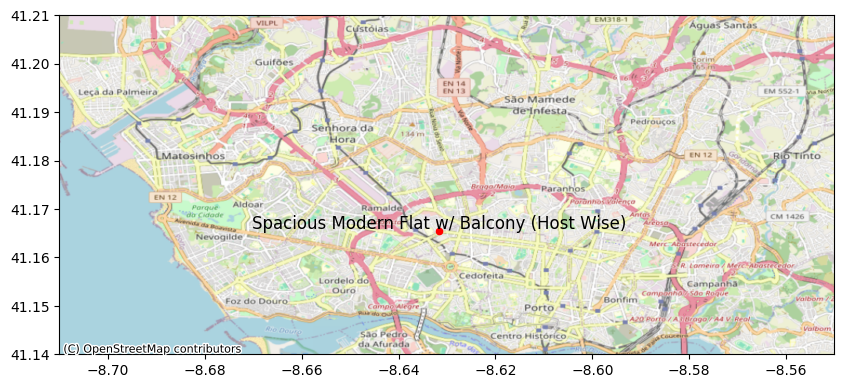

In [43]:
def topLocation():
    # Calcular o anfitrião com mais alojamentos
    host_counts = listings['host_id'].value_counts()
    top_host_id = host_counts.idxmax()

    # Filtrar alojamentos do anfitrião mais ativo
    top_host_listings = listings[listings['host_id'] == top_host_id]

    # Converter para GeoDataFrame
    gdf = gpd.GeoDataFrame(top_host_listings, geometry=gpd.points_from_xy(top_host_listings.longitude, top_host_listings.latitude))

    # Ponto central (Porto)
    porto_center = Point(-8.6308, 41.1647)

    # Calcular a distância ao centro do Porto
    gdf['distance_to_center'] = gdf.distance(porto_center)

    # Encontrar o alojamento mais próximo do centro
    min_distance_idx = gdf['distance_to_center'].idxmin()
    closest_listing = gdf.loc[min_distance_idx]

    return closest_listing['name'], closest_listing['host_name'], closest_listing['latitude'], closest_listing['longitude']

def desenhaTop():
    name, host_name, latitude, longitude = topLocation()
    
    # Criar um mapa com a localização do alojamento mais central
    fig, ax = plt.subplots(figsize=(10, 15))

    # Criar GeoDataFrame para o alojamento mais central
    d = {'col1': ['target'], 'geometry': [Point(longitude, latitude)]}
    central_location = gpd.GeoDataFrame(d)
    central_location.set_crs(epsg=4326, inplace=True)



    # Adicionar o mapa base
    central_location.plot(ax=ax, color='red', markersize=20)
    ax.set_aspect('equal')  # Ensuring equal aspect ratio
    # Set axis limits to zoom in around the point of interest
    ax.set_xlim([-8.71, -8.55])
    # ax.set_ylim([central_location.geometry.y.iloc[0] - bleed, central_location.geometry.y.iloc[0] + bleed])
    ax.set_ylim([41.14, 41.21])
    
    print(ax.get_xlim(), ax.get_ylim())

    ctx.add_basemap(ax, crs=central_location.crs, source=ctx.providers.OpenStreetMap.Mapnik)
    #ctx.add_basemap(ax, crs=central_location.crs, source=ctx.providers.CartoDB.Positron)


    # Adicionar rótulo
    ax.text(float(central_location.geometry.x.iloc[0]), float(central_location.geometry.y.iloc[0] + 0.0005), f'{name} ({host_name})', fontsize=12, ha='center')

    plt.show()

desenhaTop()

# Tarefa 1
---

In [1]:
# Tarefa 1

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

# um tuplo (axioma,regras de expansão,ângulo inicial em graus,ângulo de rotação em graus)
lsystem = tuple[str,dict[str,str],float,float]

tree1 : lsystem = ("F",{"F":"F[-F]F[+F][F]"},90,30)
tree2 : lsystem = ("X",{"F":"FF","X":"F-[[X]+X]+F[+FX]-X"},90,22.5)
bush1 : lsystem = ("Y",{"X":"X[-FFF][+FFF]FX","Y":"YFX[+Y][-Y]"},90,25.7)
bush2 : lsystem = ("VZFFF",{"V":"[+++W][---W]YV","W":"+X[-W]Z","X":"-W[+X]Z","Y":"YZ","Z":"[-FFF][+FFF]F"},90,20)
plant1 : lsystem = ("X",{"X":"F+[[X]-X]-F[-FX]+X)","F":"FF"},60,25)

def expandeLSystem(l:lsystem,n:int) -> str:
    axioma, regras, _, _ = l  # Desempacotamos o L-system, ignorando os ângulos
    resultado = axioma  # Inicializamos com o axioma

    for _ in range(n):  # Repetimos a expansão n vezes
        nova_string = ""  # Iniciamos uma nova string para a iteração atual
        for char in resultado:  # Iteramos sobre cada caractere da string atual
            if char in regras:  # Se o caractere tem uma regra de substituição definida
                nova_string += regras[char]  # Substituímos pelo valor correspondente na regra
            else:
                nova_string += char  # Mantemos o caractere se não houver regra de substituição
        resultado = nova_string  # Atualizamos o resultado para a próxima iteração

    return resultado  # Retornamos o resultado após n iterações

def desenhaTurtle(steps:str,start_pos:(float,float),start_angle:float,side:float,theta:float) -> list[list[(float,float)]]:
    pos = start_pos
    angle = start_angle
    lines = [[pos]]
    stack = []
    for s in steps:
        if s=="F":
            pos = (pos[0] + side * math.cos(math.radians(angle)),pos[1] + side * math.sin(math.radians(angle)))
            lines[-1].append(pos)
        elif s=="-": angle = angle-theta
        elif s=="+": angle = angle+theta
        elif s=="[": stack.append((pos,angle))
        elif s=="]": pos,angle = stack.pop() ; lines.append([pos])
    return lines

def desenhaLSystem(l:lsystem,n:int):

    axioma, regras, start_angle, theta = l

    # s = expandeLSystem(l,n)

    fig, ax = plt.subplots()
    
    # Configurações iniciais
    start_pos = (0, 0)  # Posição inicial
    side = 10  # Comprimento de cada segmento de linha

    # Desenhar cada expansão do L-system com diferentes configurações
    for i in range(n + 1):
        s = expandeLSystem((axioma, regras, start_angle, theta), i)
        lines = desenhaTurtle(s, start_pos, start_angle, side, theta)
        
        # Cor e grossura da linha dependem do nível de expansão i
        color = plt.cm.viridis(i / n)  # Escolhe uma cor no mapa de cores 'viridis'
        linewidth = max(1, (n - i) * 2 / n)  # Grossura da linha decresce com o nível
        
        # Desenhar linhas
        for line in lines:
            x, y = zip(*line)  # Desempacotar pontos
            ax.plot(x, y, color=color, linewidth=linewidth, label=f'Nível {i}' if i == n else "")
            
    # Configurações dos eixos e legendas
    ax.axis('equal')  # Mantém a proporção dos eixos
    ax.set_axis_off()  # Desliga os eixos
    plt.legend(title=f'Expansão do L-system para n={i}')

    plt.show()

In [26]:
def desenhaLSystem(l: tuple, n: int):
    axioma, regras, start_angle, theta = l
    fig, axes = plt.subplots(1, n + 1, figsize=(10, 5))  # Configura subplots para cada nível
    
    # Configurações iniciais
    start_pos = (0, 0)  # Posição inicial
    side = 10  # Comprimento de cada segmento de linha

    # Desenhar cada expansão do L-system com diferentes configurações
    for i in range(n + 1):
        s = expandeLSystem((axioma, regras, start_angle, theta), i)
        lines = desenhaTurtle(s, start_pos, start_angle, side, theta)
        ax = axes[i]  # Seleciona o subplot adequado

        # Cor e grossura da linha dependem do nível de expansão i
        color = plt.cm.viridis(i / n)  # Escolhe uma cor no mapa de cores 'viridis'
        linewidth = max(1, (n - i) * 2 / n)  # Grossura da linha decresce com o nível
        
        # Desenhar linhas no subplot atual
        for line in lines:
            x, y = zip(*line)  # Desempacotar pontos
            ax.plot(x, y, color=color, linewidth=linewidth)
        
        ax.set_title(f'n={i}')  # Título para cada subplot
        ax.axis('equal')  # Mantém a proporção dos eixos
        ax.set_axis_off()  # Desliga os eixos

    plt.tight_layout()  # Ajusta o layout para evitar sobreposição
    plt.show()

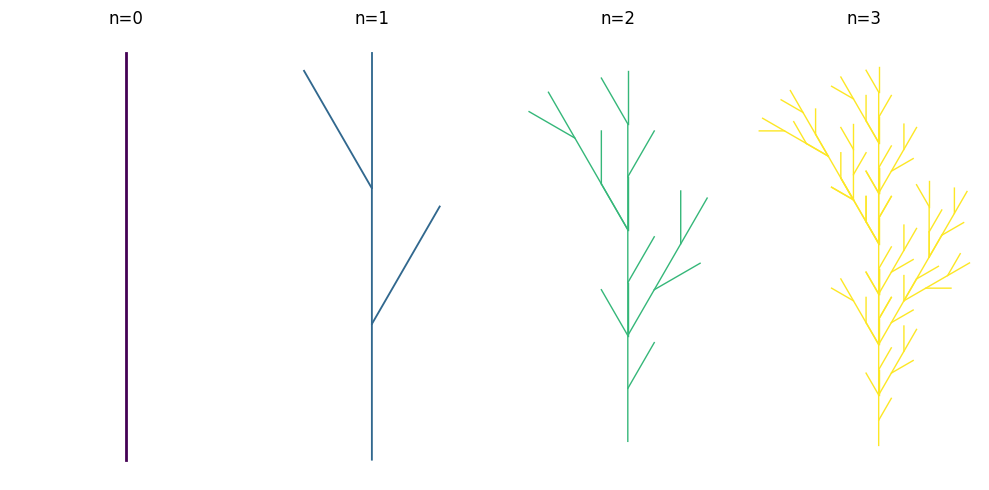

In [27]:
desenhaLSystem(tree1, 3)

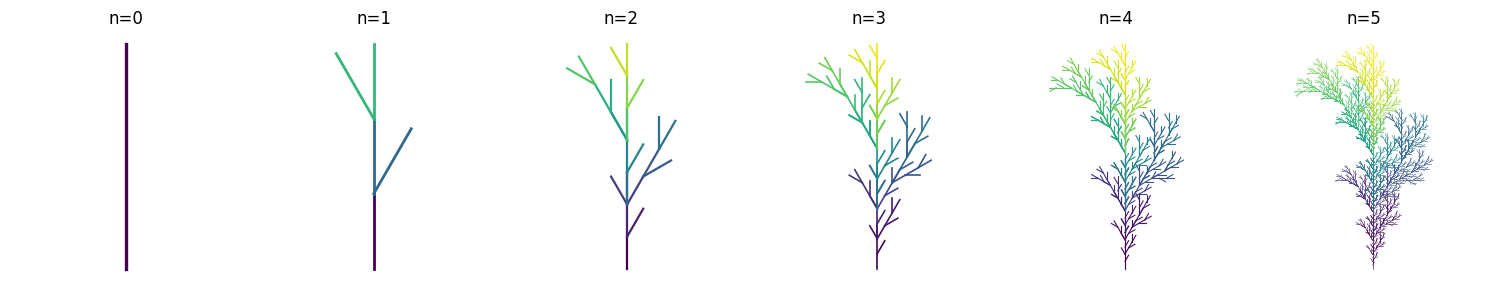

In [3]:
def desenhaLSystem(l: tuple, n: int):
    axioma, regras, start_angle, theta = l
    fig, axes = plt.subplots(1, n + 1, figsize=(15, 3))  # Ajusta o tamanho dos subplots

    start_pos = (0, 0)
    side = 10  # Tamanho de cada passo

    # Cada iteração de expansão do L-system
    for i in range(n + 1):
        s = expandeLSystem((axioma, regras, start_angle, theta), i)
        lines = desenhaTurtle(s, start_pos, start_angle, side, theta)
        ax = axes[i]

        depth_stack = []
        depth = 0
        depth_color_map = {}  # Mapeamento de profundidade para linhas

        # Calcula profundidade e guarda linhas com profundidade
        for line in lines:
            for point_index in range(len(line) - 1):
                if point_index == 0 or line[point_index] != line[point_index - 1]:
                    if s[point_index] == '[':
                        depth_stack.append(depth)
                        depth += 1
                    elif s[point_index] == ']':
                        depth = depth_stack.pop()
                
                depth_color_map.setdefault(depth, []).append((line[point_index], line[point_index + 1]))


        linewidth = max(0.1, (n - i+1) * 2 / n)  # Grossura da linha decresce com o nível 

        # Desenhar cada segmento de linha com a cor baseada na profundidade
        for depth, segments in depth_color_map.items():
            color = plt.cm.viridis(depth / (max(depth_color_map.keys()) + 1))  # Escolhe uma cor
            for start, end in segments:
                ax.plot([start[0], end[0]], [start[1], end[1]], color=color, linewidth=linewidth)

        ax.set_title(f'n={i}')  # Título de cada subplot
        ax.axis('equal')
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

desenhaLSystem(tree1, 5)

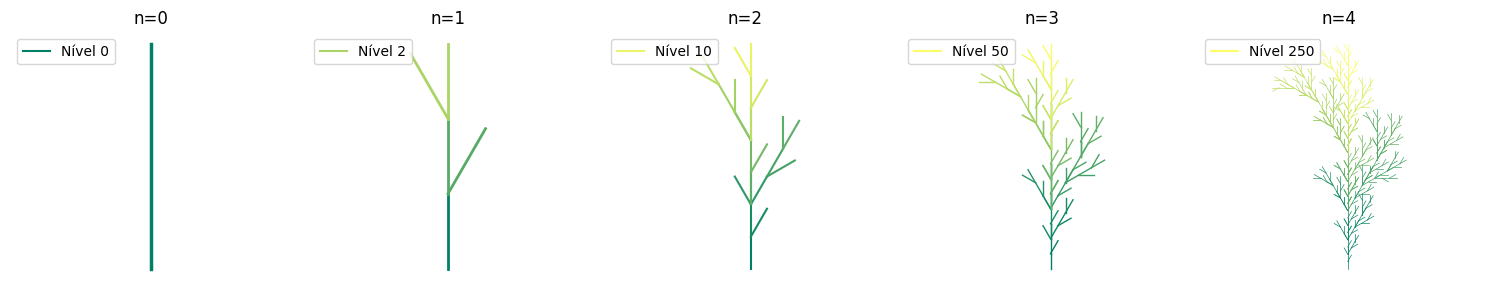

In [23]:
def desenhaLSystem(l: tuple, n: int):
    axioma, regras, start_angle, theta = l
    fig, axes = plt.subplots(1, n + 1, figsize=(15, 3))  # Ajusta o tamanho dos subplots

    start_pos = (0, 0)
    side = 3  # Tamanho de cada passo

    # Cada iteração de expansão do L-system
    for i in range(n + 1):
        s = expandeLSystem((axioma, regras, start_angle, theta), i)
        lines = desenhaTurtle(s, start_pos, start_angle, side, theta)
        ax = axes[i]

        depth_stack = []
        depth = 0
        depth_color_map = {}  # Mapeamento de profundidade para linhas

        # Calcula profundidade e guarda linhas com profundidade
        for line in lines:
            for point_index in range(len(line) - 1):
                if point_index == 0 or line[point_index] != line[point_index - 1]:
                    if s[point_index] == '[':
                        depth_stack.append(depth)
                        depth += 1
                    elif s[point_index] == ']':
                        depth = depth_stack.pop()
                
                depth_color_map.setdefault(depth, []).append((line[point_index], line[point_index + 1]))
        
        linewidth = max(0.1, (n - i+1) * 2 / n)  # Grossura da linha decresce com o nível 

        # Desenhar cada segmento de linha com a cor baseada na profundidade
        legend_handles = []  # Para guardar as legendas
        for depth, segments in sorted(depth_color_map.items()):
            color = plt.cm.summer(depth / (max(depth_color_map.keys()) + 1))  # Escolhe uma cor
            # Guarda o primeiro segmento para a legenda
            if depth == max(depth_color_map.keys()):  # Somente adiciona a legenda para a maior profundidade
                line_label = ax.plot([], [], color=color, label=f'Nível {depth}')[0]
                legend_handles.append(line_label)
            for start, end in segments:
                ax.plot([start[0], end[0]], [start[1], end[1]], color=color, linewidth=linewidth)

        ax.set_title(f'n={i}')  # Título de cada subplot
        ax.axis('equal')
        ax.set_axis_off()
        if legend_handles:
            ax.legend(handles=legend_handles, loc='upper left')

    plt.tight_layout()
    plt.show()

desenhaLSystem(tree1, 4)

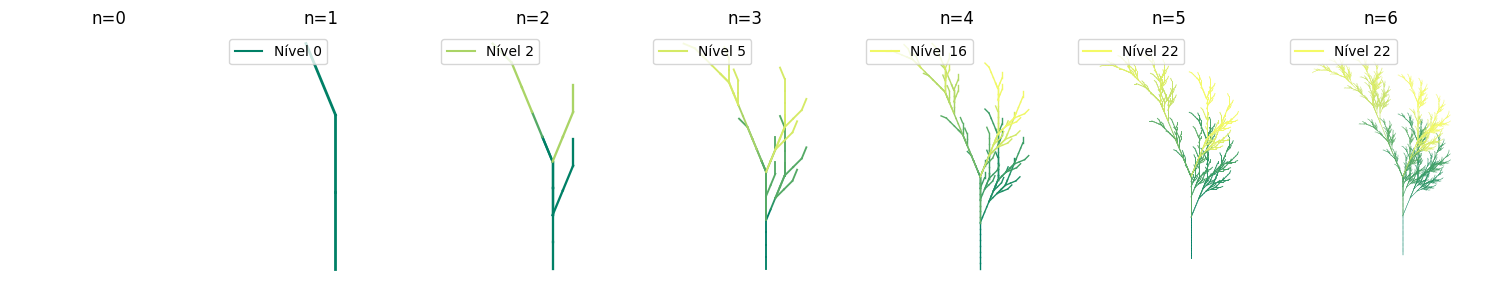

In [24]:
tree1 : lsystem = ("F",{"F":"F[-F]F[+F][F]"},90,30)
tree2 : lsystem = ("X",{"F":"FF","X":"F-[[X]+X]+F[+FX]-X"},90,22.5)
bush1 : lsystem = ("Y",{"X":"X[-FFF][+FFF]FX","Y":"YFX[+Y][-Y]"},90,25.7)
bush2 : lsystem = ("VZFFF",{"V":"[+++W][---W]YV","W":"+X[-W]Z","X":"-W[+X]Z","Y":"YZ","Z":"[-FFF][+FFF]F"},90,20)
plant1 : lsystem = ("X",{"X":"F+[[X]-X]-F[-FX]+X)","F":"FF"},60,25)

desenhaLSystem(tree2, 6)

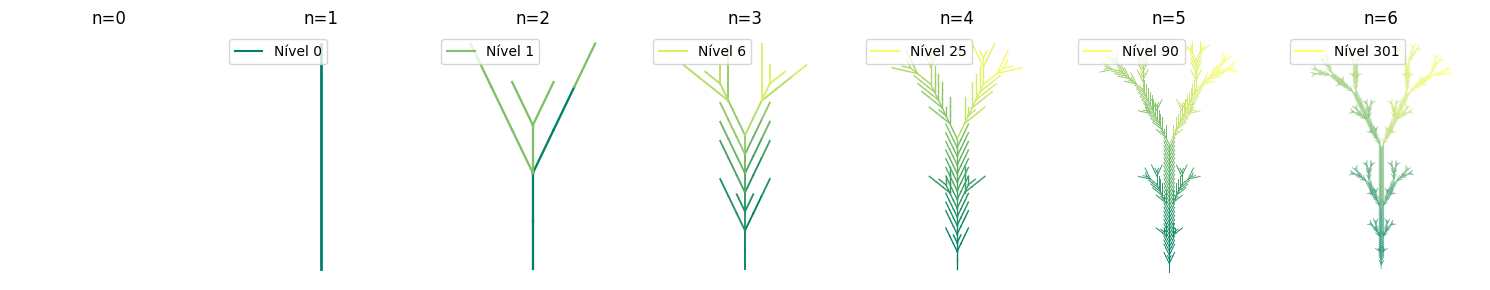

In [25]:
desenhaLSystem(bush1, 6)

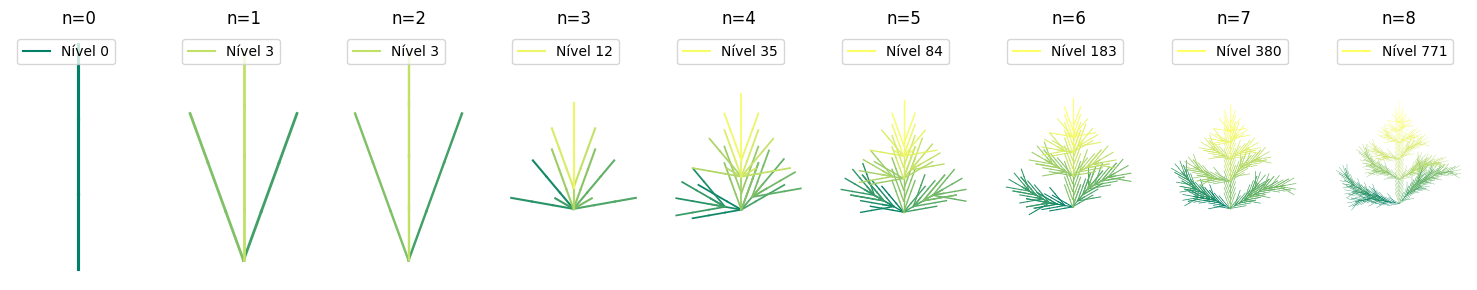

In [26]:
desenhaLSystem(bush2, 8)

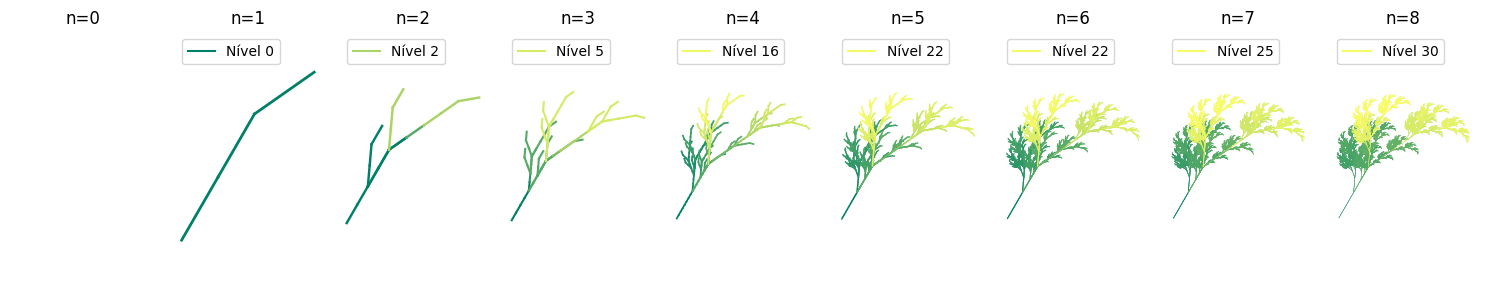

In [27]:
desenhaLSystem(plant1, 8)